In [39]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Read Data

In [41]:
data = pd.read_csv("Data/video_game_sales.csv")

In [42]:
type(data)

pandas.core.frame.DataFrame

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


# Data Preprocessing

In [44]:
mean_user_score = data[data['User_Score']!='tbd']['User_Score'].astype(float).mean()
data['User_Score'] = data['User_Score'].replace('tbd', mean_user_score)
data['User_Score'] = data['User_Score'].astype(float)

In [45]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
data.interpolate(inplace=True)
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,79.0,62.000000,8.150000,515.500000,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,83.0,70.333333,8.166667,271.666667,NaN,NaN


In [47]:
data.dropna(inplace=True)
data = data.reset_index(drop=True)

In [48]:
print('The number of duplicated data: ',data.duplicated().sum())

The number of duplicated data:  0


In [49]:
df_input = data
df_output = data[['Global_Sales']]

### Divide variables into categorical variables and numeric variables:

In [50]:
df_numeric = df_input.select_dtypes(exclude=['object'])
df_category = df_input.select_dtypes(include = ['object'])
df_numeric.columns

Index(['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count'],
      dtype='object')

### Remove Outlier (No need in Random Forest)

In [51]:
df_remove_outlier = pd.concat([df_numeric, df_category], axis=1)

In [52]:
outlier_column = list(df_numeric.columns)
outlier_column

['Year_of_Release',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count']

In [53]:
from analysis.analyzer import TTTH_Analyzer
_analyzer = TTTH_Analyzer()

In [54]:
upperOutliner_i = []
lowerOutliner_i = []
for column in outlier_column:
    outlier = _analyzer.check_outlier_of_numerical_variable(column, df_remove_outlier)
    if (outlier):
        upperOutliner, lowerOutliner = outlier
        upperOutliner_i.append(upperOutliner)
        lowerOutliner_i.append(lowerOutliner)

variable Year_of_Release have 0.01% upper outlier
variable Year_of_Release have 0.06% lower outlier
variable NA_Sales have 10.701% upper outlier
variable NA_Sales have 0.0% lower outlier
variable EU_Sales have 11.968% upper outlier
variable EU_Sales have 0.0% lower outlier
variable JP_Sales have 22.156% upper outlier
variable JP_Sales have 0.0% lower outlier
variable Other_Sales have 12.632% upper outlier
variable Other_Sales have 0.0% lower outlier
variable Global_Sales have 10.681% upper outlier
variable Global_Sales have 0.0% lower outlier
variable Critic_Score have 0.0% upper outlier
variable Critic_Score have 1.076% lower outlier
variable Critic_Count have 3.741% upper outlier
variable Critic_Count have 0.0% lower outlier
variable User_Score have 0.0% upper outlier
variable User_Score have 6.809% lower outlier
variable User_Count have 14.291% upper outlier
variable User_Count have 0.0% lower outlier


In [55]:
df_remove_outlier.drop(upperOutliner, inplace=True)
df_remove_outlier.drop(lowerOutliner, inplace=True)

In [56]:
df_remove_outlier.columns

Index(['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Name', 'Platform', 'Genre', 'Publisher', 'Developer',
       'Rating'],
      dtype='object')

In [57]:
df_remove_outlier_numeric = df_remove_outlier.select_dtypes(exclude=['object'])
df_remove_outlier_numeric.reset_index(inplace =True, drop=True)
df_remove_outlier_numeric

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2006.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.600000,129.000000
1,2007.0,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.700000,146.000000
2,2010.0,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.300000,106.000000
3,2009.0,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.400000,52.000000
4,2005.0,4.74,9.20,4.16,2.04,20.15,77.0,58.0,7.900000,50.000000
...,...,...,...,...,...,...,...,...,...,...
8517,2003.0,0.01,0.00,0.00,0.00,0.01,53.0,4.0,7.125046,38.000000
8518,2008.0,0.01,0.00,0.00,0.00,0.01,48.0,10.0,7.125046,33.000000
8519,2011.0,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.200000,13.000000
8520,2008.0,0.01,0.00,0.00,0.00,0.01,62.0,8.0,7.125046,9.666667


# Building Model

In [113]:
X = df_numeric.drop(['Global_Sales','EU_Sales','JP_Sales','Other_Sales', 'Year_of_Release', 'User_Score' ],axis=1)
y = df_numeric['Global_Sales']
X

,NA_Sales,Critic_Score,Critic_Count,User_Count
0,41.36,76.0,51.0,322.000000
1,15.68,82.0,73.0,709.000000
2,15.61,80.0,73.0,192.000000
3,11.28,89.0,65.0,431.000000
4,13.96,58.0,41.0,129.000000
...,...,...,...,...
9938,0.01,53.0,4.0,38.000000
9939,0.01,48.0,10.0,33.000000
9940,0.00,60.0,12.0,13.000000
9941,0.01,62.0,8.0,9.666667


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

In [115]:

clf = RandomForestRegressor(n_estimators=250)
clf

RandomForestRegressor(n_estimators=250)

In [116]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [117]:
clf.score(X,y)

0.8619325010431804

In [118]:
clf.score(X_train,y_train)

0.983426891547761

In [119]:
clf.score(X_test, y_test)

0.7397323309487629

### Predict a new value

In [120]:
X_new = [[20, 90.0, 80.0, 709]]
y_new = clf.predict(X_new)
print('New Global Sales: ',round(float(y_new),3))

New Global Sales:  31.309


# Visualization

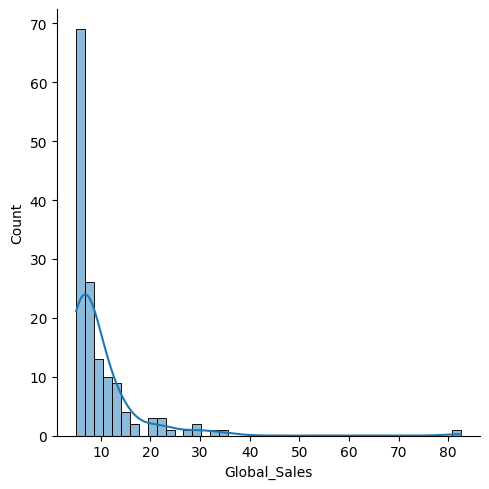

In [66]:
sns.displot(data=data, x = data[data['Global_Sales']>5]['Global_Sales'], kde=True)